LINEAR REGRESSION WITH HOUSES

In [25]:
import pandas as pd
import numpy as np

houses = pd.read_csv("AmesHousing.txt",sep="\t")

train = houses.iloc[0:1400]
test  = houses.iloc[1400:]

target = "SalePrice"

#on sélectionne les valeurs numériques
numerical_train = train.select_dtypes(include=['int','float'])

#on supprime les colonnes inutiles
drop_cols = ["PID","Year Remod/Add","Garage Yr Blt","Mo Sold","Yr Sold"]
numerical_train = numerical_train.drop(drop_cols, axis=1)

#calcul des valeurs manquantes
null_series = numerical_train.isnull().sum()

#on garde les données avec aucune valeur manquante
full_cols_series = null_series[null_series == 0]

#aucune colonnes manquantes
print(full_cols_series)

#evaluation de la correlation entre les caractéristiques et le prix
train[["Garage Area","Gr Liv Area","Overall Cond","SalePrice"]].corr()



Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.463455,-0.121328,0.659605
Gr Liv Area,0.463455,1.000000,-0.128075,0.697764
Overall Cond,-0.121328,-0.128075,1.000000,-0.093996
SalePrice,0.659605,0.697764,-0.093996,1.000000


In [29]:
#nombre de colonnes
len(full_cols_series)

#le index permet de récupérer le noms des colonnes
train_subset = train[full_cols_series.index]

#matrice des coeff de correlation
corrmat = train_subset.corr()

sorted_corrs = corrmat["SalePrice"].abs().sort_values()

print(sorted_corrs)


Misc Val           0.014813
3Ssn Porch         0.037513
Low Qual Fin SF    0.060403
MS SubClass        0.083460
Order              0.092084
Overall Cond       0.093996
Screen Porch       0.094435
Bedroom AbvGr      0.103400
Kitchen AbvGr      0.130889
Pool Area          0.148196
Enclosed Porch     0.165717
2nd Flr SF         0.201196
Half Bath          0.271517
Lot Area           0.272701
Wood Deck SF       0.324237
Open Porch SF      0.348723
Fireplaces         0.477546
TotRms AbvGrd      0.482716
Full Bath          0.514917
Year Built         0.595323
1st Flr SF         0.657409
Garage Area        0.659605
Garage Cars        0.664401
Gr Liv Area        0.697764
Overall Qual       0.807250
SalePrice          1.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

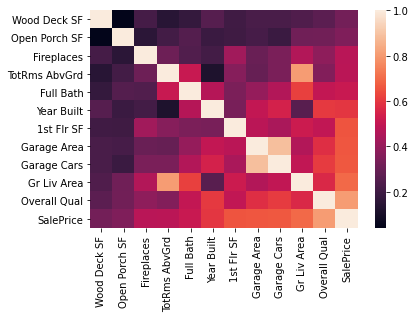

In [30]:
import seaborn as sb

#selection des correlations > à 0,3, c'est arbitraire, on peut faire varier pour vérifier la précision
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()

#trace de la heatmap
sb.heatmap(corrmat)


In [31]:
#on supprime les colonnes où les valeurs sont moins continues (cf doc des caractéristiques), qui créé de la co-linéarité
final_corr_cols = strong_corrs.drop(["Garage Cars","TotRms AbvGrd"])
test[final_corr_cols.index].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 1400 to 2929
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1530 non-null   int64  
 1   Open Porch SF  1530 non-null   int64  
 2   Fireplaces     1530 non-null   int64  
 3   Full Bath      1530 non-null   int64  
 4   Year Built     1530 non-null   int64  
 5   1st Flr SF     1530 non-null   int64  
 6   Garage Area    1529 non-null   float64
 7   Gr Liv Area    1530 non-null   int64  
 8   Overall Qual   1530 non-null   int64  
 9   SalePrice      1530 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 119.7 KB


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#on constate que la colonne Garage Area a 1529 contre 1530 pour les autres
features = final_corr_cols.drop(["SalePrice"]).index
target = "SalePrice"
clean_test = test[final_corr_cols.index].dropna()

#regression
lr = LinearRegression()

lr.fit(train[features],train["SalePrice"])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse  = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)


32881.2518713885
40199.47303228314
